## LBP(Local Binary Pattern)
    이미지의 미세한 질감(micro-texture) 및 얼굴 인식에 활용되는 효과적인 연산자

<img src='lbp.png' alt='lbp' width="60%" heigh="60%">

#### 원시 LBP
    - 영상의 밝기가 변해도 robust한 특징을 가짐

    1. 중심 픽셀과 각 8개 이웃 픽셀 값을 비교 (시계/반시계 방향으로)
    2. 해당 이웃 픽셀이 중심 픽셀보다 크면 1, 아니면 0을 할당 ⇒ 이진 수열(e.g., 10011010)이 생성됨
    3. 이미지 전체에 대한 LBP 히스토그램 계산
    4. 계산된 히스토그램을 해당 이미지에 대한 특징 벡터(feature vector)로 사용
        - 예) 이웃 픽셀이 8개인 경우: 256 차원의 특징 벡터

#### 원형 LBP
    - 사각형의 셀 대신 원형 셀 사용
    - 반지름을 설정하여 주변의 8개(256개 특성), 16개(65536) 포인트 추출해서 중앙 픽셀과 비교
    - 소수점 위치의 픽셀인 경우 bilinear 보간법을 사용하여 픽셀값 유추

#### Uniform LBP
    특징의 개수가 많을 수록 계산 복잡도 증가, 특징의 갯수를 줄일 수 있는 방법

    - uniform 패턴 : 0 → 1 또는 1 → 0의 전이가 3번 미만인 패턴은 각각 라벨
        예) 11111111(0번 전이), 00000111(1번 전이), 00111000(2번 전이)
    - non-uniform 패턴 : 전이가 3번 이상인 패턴을 하나로 취급
        예) 00011011(3번 전이), 10110011(4번 전이), 01010111(5번 전이)
    - 8개 픽셀값을 고려하는 경우, 58개의 uniform 패턴과 1개의 non-uniform 패턴이 필요하게 됨

<img src='rotation_invariant.png' alt='rotation_invariant' width="50%" heigh="50%">

#### Rotation-invariant LBP
    - 원시 LBP나 원형 LBP는 이미지의 회전에는 취약, 회전에도 robust한 특성을 만들기 위해 제안됨
    - 특성 갯수가 횟기적으로 감소

#### Uniform & Rotation-invariant LBP
    - 8개 이웃 픽셀값을 고려하는 경우, 10개의 특성만으로 질감 표현 가능

## Practice
### 1) LBP 적용해보기

In [1]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
%matplotlib inline

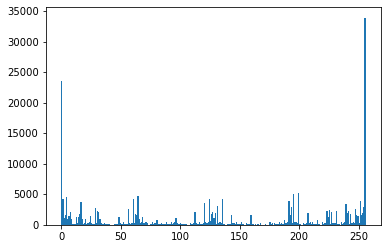

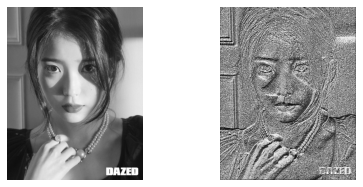

In [15]:
## LBP 파라미터
radius = 1
numPoints = 8 * radius
method = 'default'

img = cv2.imread('iu.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# LBP 계산
lbp = local_binary_pattern(gray, numPoints, radius, method)
lbp = lbp.astype('uint8')

## LBP 히스토그램 시각화
n_bins = lbp.max() + 1

plt.hist(lbp.ravel(), bins=n_bins, range=(0,n_bins))
plt.show()

## 이미지 시각화
gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
lbp = cv2.cvtColor(lbp, cv2.COLOR_GRAY2BGR)

plt.figure(figsize=(7, 7))
plt.subplot(2, 2, 1)
plt.imshow(gray)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(lbp)
plt.axis('off')

plt.show()

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lbp = cv2.cvtColor(lbp, cv2.COLOR_BGR2GRAY)
print(">> shape of gray image {}".format(gray.shape))
print(gray)
print()

print(">> shape of lbp image {}".format(lbp.shape))
print(lbp)

>> shape of gray image (551, 432)
[[103 104 102 ... 123 122 121]
 [102 100 101 ... 121 117 121]
 [101 105 102 ... 122 118 121]
 ...
 [ 21  20  19 ...  13  11  17]
 [ 20  22  20 ...  16  19  12]
 [ 22  24  22 ...  18  21  18]]

>> shape of lbp image (551, 432)
[[  1   0  16 ...   0  16  80]
 [134 255 238 ... 126 255  68]
 [199   0 241 ... 120 251  68]
 ...
 [132 252 255 ... 220 255   0]
 [199  64 250 ... 225  64 124]
 [  3   0  25 ...  19   0  16]]


In [ ]:
'''
scikit-learn에서 제공하는 LBP 연산자는 내부적으로 제로 패딩(zero-padding) 기법을 사용함

[[  0   0   0   0 ...   0   0   0   0]
 [  0 103 104 102 ... 123 122 121   0]
 [  0 102 100 101 ... 121 117 121   0]
 [  0 101 105 102 ... 122 118 121   0]
 ...
 [  0  21  20  19 ...  13  11  17   0]
 [  0  20  22  20 ...  16  19  12   0]
 [  0  22  24  22 ...  18  21  18   0]
 [  0   0   0   0 ...   0   0   0   0]]

'''

### 2) 조명 변화에 불변인 특성 확인하기

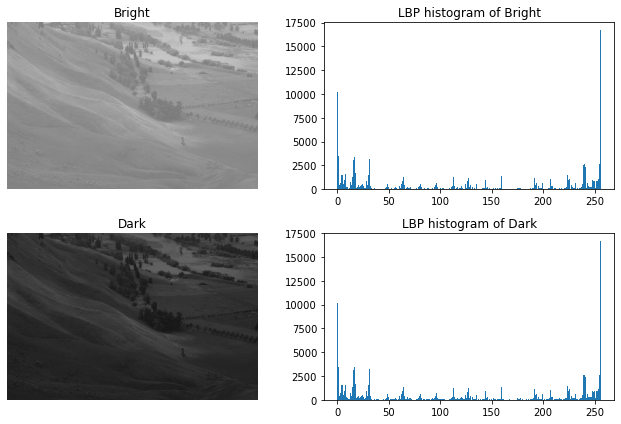

In [4]:
## LBP 파라미터
radius = 1
numPoints = 8 * radius
method = 'default'

img = cv2.imread('landscape.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## 어두운 이미지 생성
gray2 = gray1.copy()
gray2 = gray2 - 100

# LBP 계산
lbp1 = local_binary_pattern(gray1, numPoints, radius, method)
lbp2 = local_binary_pattern(gray2, numPoints, radius, method)

## 결과 시각화
n_bins = int(lbp1.max()) + 1
plt.figure(figsize=(9, 6))

plt.subplot(2,2,1)
plt.imshow(gray1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Bright')

plt.subplot(2,2,2)
plt.hist(lbp1.ravel(), bins=n_bins, range=(0,n_bins))
plt.title('LBP histogram of Bright')

plt.subplot(2,2,3)
plt.imshow(gray2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Dark')

plt.subplot(2,2,4)
plt.hist(lbp2.ravel(), bins=n_bins, range=(0,n_bins))
plt.title('LBP histogram of Dark')

plt.tight_layout()
plt.show()



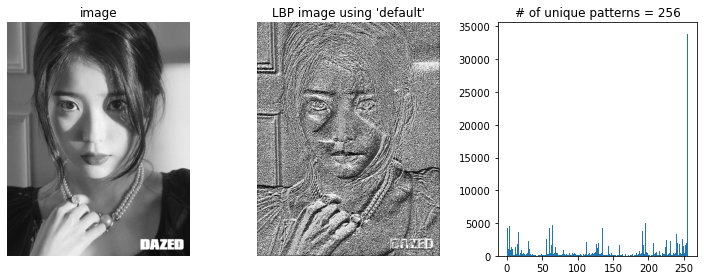

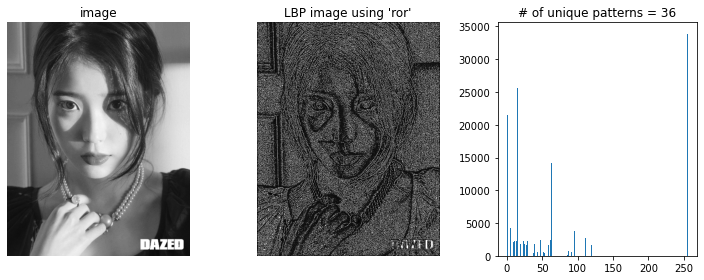

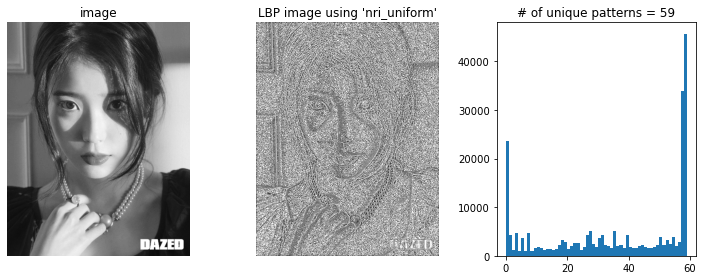

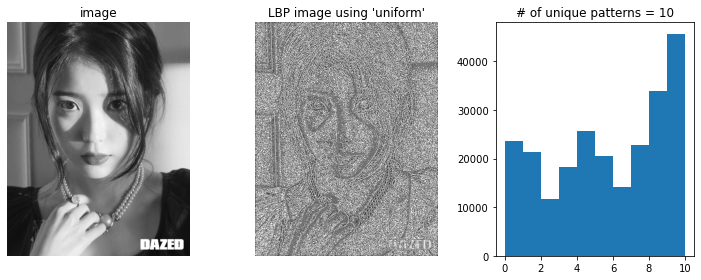

In [5]:
## LBP 파라미터
radius = 1
numPoints = 8 * radius

img = cv2.imread('iu.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## 각 LBP 방식 비교
for method in ['default', 'ror', 'nri_uniform', 'uniform']:
    lbp = local_binary_pattern(gray, numPoints, radius, method)
    lbp = lbp.astype('uint8')

    ## 결과 시각화
    n_bins = lbp.max() + 1
    plt.figure(figsize=(10,4))

    plt.subplot(1,3,1)
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    plt.title('image')
    plt.subplot(1,3,2)
    plt.imshow(lbp, cmap='gray')
    plt.axis('off')
    plt.title("LBP image using '{}'".format(method))
    plt.subplot(1,3,3)
    plt.hist(lbp.ravel(), bins=n_bins, range=(0,n_bins))
    plt.title("# of unique patterns = {}".format(len(np.unique(lbp))))

    plt.tight_layout()
    plt.show()

### 3) Homework( ~ 11/18 12:00)

In [6]:
def solution(img):
    '''
    3×3 이미지를 입력 받아 '가운데 픽셀' 관점에서
    1개의 LBP 패턴을 생성한 후
    패턴의 값을 10진수 값으로 반환해주는 함수 작성

    <조건 1>
    패턴 생성 순서 = [4 3 2
                      5 - 1
                      6 7 8]

    비트열 자리:    2^7   2^6   2^5   2^4   2^3   2^2   2^1   2^0
    패턴 순서:       8     7     6     5     4     3     2     1


    <조건 2>
    if neighbor_pixel > center:
        1
    else:
        0
    '''
    center = img[1, 1]
    pattern = 0
    pattern = pattern | (1<<0) if img[1,2] > center else pattern
    pattern = pattern | (1<<1) if img[0,2] > center else pattern
    pattern = pattern | (1<<2) if img[0,1] > center else pattern
    pattern = pattern | (1<<3) if img[0,0] > center else pattern
    pattern = pattern | (1<<4) if img[1,0] > center else pattern
    pattern = pattern | (1<<5) if img[2,0] > center else pattern
    pattern = pattern | (1<<6) if img[2,1] > center else pattern
    pattern = pattern | (1<<7) if img[2,2] > center else pattern


    return pattern

In [7]:
## test case 1
img1 = np.array([[ 30,  26,  34],
                 [ 21,  26,  28],
                 [ 23,  22,  35]])
out1 = solution(img1)
print(out1)


## test case 2
img2 = np.array([[21, 20, 19],
                 [20, 22, 20],
                 [22, 24, 22]])
out2 = solution(img2)
print(out2)



139
64
